<h1>SportLens</h1>
SportLens is a machine learning model that is used to identify which sports it is. It uses VGG16 pretrained model and kaggle 100 sports dataset to classify sports.

> Model Used : VGG16


> Datset Used : [100 Sports Image Classification
](https://www.kaggle.com/datasets/gpiosenka/sports-classification)


> Total sports : 1000








###Import Statements




In [2]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import time
import random
from google.colab import files
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.cm as cm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive
import numpy

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16

###Data Download

> kaggle installed and kaggle api is called to fetch dataset

> Configuration dictionary is set








In [ ]:
!pip install -q kaggle

In [4]:
CONFIGURATION = {
      "BATCH_SIZE":32,
      "IM_SIZE":224,
      "LEARNING_RATE": 0.001,
      "N_EPOCHS": 20,
      "DROPOUT_RATE": 0.0,
      "REGULARIZATION_RATE": 0.0,
      "N_FILTERS": 6,
      "KERNEL_SIZE": 3,
      "N_STRIDES": 1,
      "POOL_SIZE": 2,
      "N_DENSE_1": 100,
      "N_DENSE_2": 10,
       "NUM_CLASSES":100

}

In [ ]:
!mkdir /root/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gpiosenka/sports-classification

100% 423M/424M [00:12<00:00, 27.9MB/s]
100% 424M/424M [00:12<00:00, 35.8MB/s]


In [ ]:
!unzip "/content/sports-classification.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/rings/022.jpg  
  inflating: /content/dataset/train/rings/023.jpg  
  inflating: /content/dataset/train/rings/024.jpg  
  inflating: /content/dataset/train/rings/025.jpg  
  inflating: /content/dataset/train/rings/026.jpg  
  inflating: /content/dataset/train/rings/027.jpg  
  inflating: /content/dataset/train/rings/028.jpg  
  inflating: /content/dataset/train/rings/029.jpg  
  inflating: /content/dataset/train/rings/030.jpg  
  inflating: /content/dataset/train/rings/031.jpg  
  inflating: /content/dataset/train/rings/032.jpg  
  inflating: /content/dataset/train/rings/033.jpg  
  inflating: /content/dataset/train/rings/034.jpg  
  inflating: /content/dataset/train/rings/035.jpg  
  inflating: /content/dataset/train/rings/036.jpg  
  inflating: /content/dataset/train/rings/037.jpg  
  inflating: /content/dataset/train/rings/038.jpg  
  inflating: /content/dataset/train/rings/039.jpg  
  inflating: 

###Dataset Fetch

> Data fetched as tensorflow dataset


> Sparse Categorical labeling is used





In [5]:
train_directory = "/content/dataset/train"
validation_directory = "/content/dataset/valid"
test_directory = "/content/dataset/test"

In [6]:
#generates image label from directory structure(angry te images etc)
#seed for shuffling runtime
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,


)

Found 13492 files belonging to 100 classes.


In [7]:
#generates image label from directory structure(angry te images etc)
#seed for shuffling runtime
val_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_directory,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,


)

Found 500 files belonging to 100 classes.


In [8]:
#generates image label from directory structure(angry te images etc)
#seed for shuffling runtime
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,


)

Found 500 files belonging to 100 classes.


In [9]:
CLASS_NAME = test_dataset.class_names
CLASS_NAME

['air hockey',
 'ampute football',
 'archery',
 'arm wrestling',
 'axe throwing',
 'balance beam',
 'barell racing',
 'baseball',
 'basketball',
 'baton twirling',
 'bike polo',
 'billiards',
 'bmx',
 'bobsled',
 'bowling',
 'boxing',
 'bull riding',
 'bungee jumping',
 'canoe slamon',
 'cheerleading',
 'chuckwagon racing',
 'cricket',
 'croquet',
 'curling',
 'disc golf',
 'fencing',
 'field hockey',
 'figure skating men',
 'figure skating pairs',
 'figure skating women',
 'fly fishing',
 'football',
 'formula 1 racing',
 'frisbee',
 'gaga',
 'giant slalom',
 'golf',
 'hammer throw',
 'hang gliding',
 'harness racing',
 'high jump',
 'hockey',
 'horse jumping',
 'horse racing',
 'horseshoe pitching',
 'hurdles',
 'hydroplane racing',
 'ice climbing',
 'ice yachting',
 'jai alai',
 'javelin',
 'jousting',
 'judo',
 'lacrosse',
 'log rolling',
 'luge',
 'motorcycle racing',
 'mushing',
 'nascar racing',
 'olympic wrestling',
 'parallel bar',
 'pole climbing',
 'pole dancing',
 'pole vau

In [11]:
len(train_dataset)

422

###Data Visualization

> Dataset visualized using matplotlib



In [10]:
for image_batch, labels_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[75 59 29 38 24 15 59  3 25  0 83 54 26 16 26 12 38 72 70 32 55 61 27 59
 32 93 12 18 28 48 66 31]


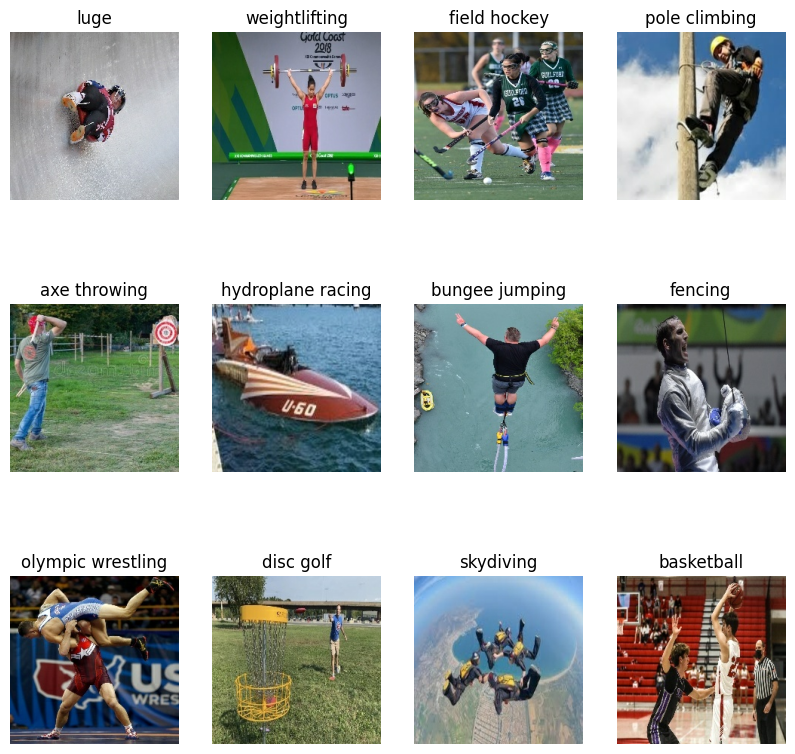

In [12]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(CLASS_NAME[labels_batch[i]])
        plt.axis("off")

###Pre-processing

> Prefetch dataset conversion done for faster data training

> Data augmentation applied(Contrast based,Horizontal Flip,Rotation of Data) for training data

> Data normalization applied for all data







In [13]:
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
augment_layers = tf.keras.Sequential([
       RandomRotation(factor = (-0.025, 0.025),),
       RandomFlip(mode='horizontal',),
       RandomContrast(factor=0.1),

])

In [15]:
train_dataset = train_dataset.map(
    lambda x, y: (augment_layers(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
resize_rescale_layers = tf.keras.Sequential([
       Resizing(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
       Rescaling(1./255),
])

In [17]:
train_dataset = train_dataset.map(
    lambda x, y: (resize_rescale_layers(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [36]:
val_dataset = val_dataset.map(
    lambda x, y: (resize_rescale_layers(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [37]:
test_dataset = test_dataset.map(
    lambda x, y: (resize_rescale_layers(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

###Model Architecture(from Scratch)

> A scratch model used



In [ ]:

IM_SIZE = CONFIGURATION['IM_SIZE']
DROPOUT_RATE = CONFIGURATION['DROPOUT_RATE']
REGULARIZATION_RATE = CONFIGURATION['REGULARIZATION_RATE']
N_FILTERS = CONFIGURATION['N_FILTERS']
KERNEL_SIZE = CONFIGURATION['KERNEL_SIZE']
POOL_SIZE = CONFIGURATION['POOL_SIZE']
N_STRIDES = CONFIGURATION['N_STRIDES']

lenet_model = tf.keras.Sequential([
    InputLayer(input_shape = (None, None, 3)),
    resize_rescale_layers,

    Conv2D(filters = N_FILTERS , kernel_size = KERNEL_SIZE, strides = N_STRIDES , padding='valid',
          activation = 'relu',kernel_regularizer = L2(REGULARIZATION_RATE)),
    BatchNormalization(),
    MaxPool2D (pool_size = POOL_SIZE, strides= N_STRIDES*2),
    Dropout(rate = DROPOUT_RATE ),

    Conv2D(filters = N_FILTERS*2 + 4, kernel_size = KERNEL_SIZE, strides=N_STRIDES, padding='valid',
          activation = 'relu', kernel_regularizer = L2(REGULARIZATION_RATE)),
    BatchNormalization(),
    MaxPool2D (pool_size = POOL_SIZE, strides= N_STRIDES*2),

    Flatten(),

    Dense( CONFIGURATION['N_DENSE_1'], activation = "relu", kernel_regularizer = L2(REGULARIZATION_RATE)),
    BatchNormalization(),
    Dropout(rate = DROPOUT_RATE),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(REGULARIZATION_RATE)),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 6)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 6)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)     

###Scratch Model Compile

> loss function used : Sparse Categorical


> metcrics used accuracy,top_k accuracy


> optimizer used : adam


> callback used: early stopping









In [97]:
loss_function = SparseCategoricalCrossentropy()
#Sparse categorical
#logits tensor is the output of multiclass classification before passing it in softmax
#less loss -> more accurate

In [ ]:
metrics = [CategoricalAccuracy(name = "accuracy"),TopKCategoricalAccuracy(k=2,name = "top_k_accuracy")]

In [ ]:
lenet_model.compile(optimizer = Adam(learning_rate = CONFIGURATION['LEARNING_RATE']),
              loss = loss_function,
              metrics = metrics,)

In [ ]:
es_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=1, #monitor validation loss
    mode='auto', baseline=None, restore_best_weights=False
)

In [ ]:

history = lenet_model.fit(
    train_dataset,
    validation_data =val_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [es_callback]

    )

Epoch 1/10
  6/106 [>.............................] - ETA: 12:14 - loss: 4.5059 - accuracy: 0.0898 - top_k_accuracy: 0.1328

KeyboardInterrupt: ignored

In [ ]:

# Check GPU availability
print("GPU Available: ", tf.test.gpu_device_name())

# # Load pre-trained VGG16 model
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Move the model to the T4 GPU
strategy = tf.distribute.MirroredStrategy()

# with strategy.scope():
#     model = tf.keras.Sequential([
#         base_model,
#         tf.keras.layers.GlobalAveragePooling2D(),
#         tf.keras.layers.Dense(256, activation='relu'),
#         tf.keras.layers.Dense(num_classes, activation='softmax')
#     ])

GPU Available:  /device:GPU:0


###VGG16 Model



> Image Size used : (224,224,3)


> One flatten layer and a dense layer of 100 labels is also used


> weight used of imagenet







In [53]:
IMAGE_SIZE = [224, 224]
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [54]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [40]:

# with strategy.scope():
#     model = tf.keras.Sequential([
#         vgg16,
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(256, activation='relu'),
#         tf.keras.layers.Dense(100, activation='softmax')
#     ])

NameError: ignored

In [55]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [29]:
len(CLASS_NAME)

100

In [44]:
x = Dense(100, activation='relu')(x)

In [56]:
prediction = Dense(len(CLASS_NAME), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [23]:
# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [57]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [58]:
loss_function = SparseCategoricalCrossentropy()
#Sparse categorical
#logits tensor is the output of multiclass classification before passing it in softmax
#less loss -> more accurate

In [72]:
# metrics = [CategoricalAccuracy(name = "accuracy"),TopKCategoricalAccuracy(k=2,name = "top_k_accuracy")]

In [59]:
# Compile the model
model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

In [75]:
print("Model Device: ", model.device)

AttributeError: ignored

In [84]:
for image_batch, labels_batch in val_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:

# history = model.fit(
#     train_dataset,
#     validation_data =val_dataset,
#     epochs = 20,
#     verbose = 1,
#     )

Epoch 1/20
422/422 [==============================] - 106s 247ms/step - loss: 4.0624 - accuracy: 0.0755 - val_loss: 3.2017 - val_accuracy: 0.2180
Epoch 2/20
422/422 [==============================] - 98s 232ms/step - loss: 2.9625 - accuracy: 0.2249 - val_loss: 2.6014 - val_accuracy: 0.2760
Epoch 3/20
422/422 [==============================] - 98s 232ms/step - loss: 2.5267 - accuracy: 0.2988 - val_loss: 2.3011 - val_accuracy: 0.3320
Epoch 4/20
422/422 [==============================] - 98s 231ms/step - loss: 2.3254 - accuracy: 0.3439 - val_loss: 2.1870 - val_accuracy: 0.3820
Epoch 5/20
422/422 [==============================] - 98s 230ms/step - loss: 2.1615 - accuracy: 0.3823 - val_loss: 2.2007 - val_accuracy: 0.3640
Epoch 6/20
422/422 [==============================] - 97s 228ms/step - loss: 2.0643 - accuracy: 0.4071 - val_loss: 2.1205 - val_accuracy: 0.3880
Epoch 7/20
422/422 [==============================] - 96s 226ms/step - loss: 1.9591 - accuracy: 0.4293 - val_loss: 2.0732 - val_a

###Model Train

> epochs used : 20



In [60]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  train_dataset,
  validation_data=val_dataset,
  epochs=20,
  steps_per_epoch=len(train_dataset),
  validation_steps=len(val_dataset)
)

Epoch 1/20


<ipython-input-60-d9535e312586>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


422/422 [==============================] - 104s 243ms/step - loss: 2.5711 - accuracy: 0.4792 - val_loss: 1.4033 - val_accuracy: 0.6900
Epoch 2/20
422/422 [==============================] - 99s 233ms/step - loss: 0.9603 - accuracy: 0.7673 - val_loss: 1.2709 - val_accuracy: 0.7420
Epoch 3/20
422/422 [==============================] - 99s 234ms/step - loss: 0.6377 - accuracy: 0.8415 - val_loss: 1.1947 - val_accuracy: 0.7540
Epoch 4/20
422/422 [==============================] - 96s 228ms/step - loss: 0.4472 - accuracy: 0.8813 - val_loss: 1.2627 - val_accuracy: 0.7520
Epoch 5/20
422/422 [==============================] - 98s 231ms/step - loss: 0.3705 - accuracy: 0.8995 - val_loss: 1.1893 - val_accuracy: 0.7760
Epoch 6/20
422/422 [==============================] - 98s 232ms/step - loss: 0.3250 - accuracy: 0.9146 - val_loss: 1.1687 - val_accuracy: 0.7620
Epoch 7/20
422/422 [==============================] - 99s 234ms/step - loss: 0.3536 - accuracy: 0.9128 - val_loss: 1.8380 - val_accuracy: 0.

###Model Evaluation

In [62]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

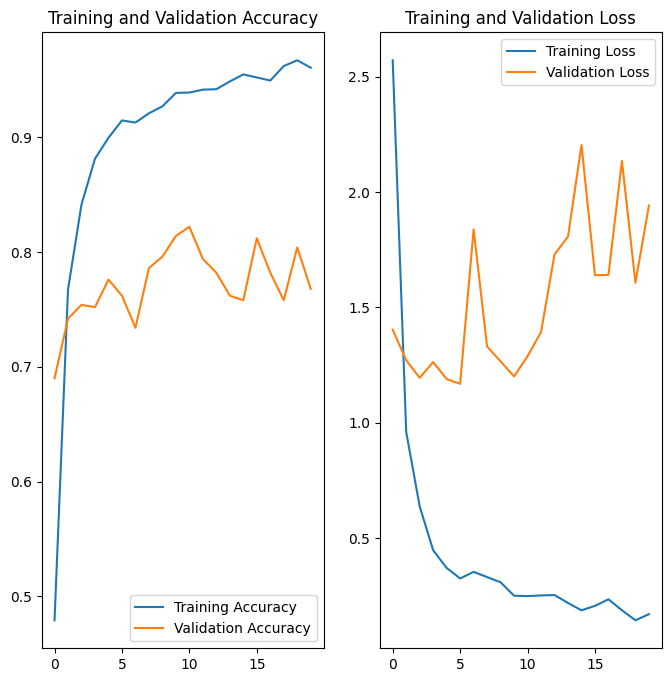

In [63]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(CONFIGURATION['N_EPOCHS']), acc, label='Training Accuracy')
plt.plot(range(CONFIGURATION['N_EPOCHS']), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(CONFIGURATION['N_EPOCHS']), loss, label='Training Loss')
plt.plot(range(CONFIGURATION['N_EPOCHS']), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [80]:
model.evaluate(test_dataset)

16/16 [==============================] - 2s 125ms/step - loss: 1.9294 - accuracy: 0.8120


[1.9294462203979492, 0.8119999766349792]

first image to predict
actual label: tug of war
1/1 [==============================] - 0s 36ms/step
predicted label: tug of war


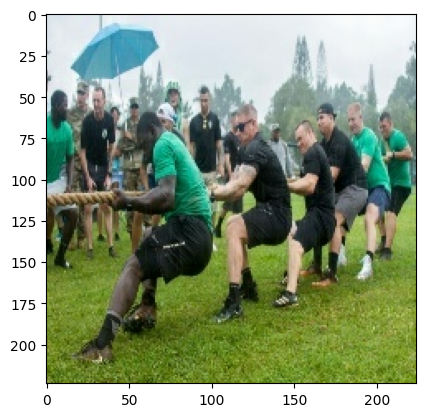

In [67]:
import numpy as np
for images_batch, labels_batch in test_dataset.take(1):

    # first_image = images_batch[0].numpy().astype('uint8')
    first_image = (images_batch[0].numpy() * 255).astype('uint8')

    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",CLASS_NAME[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",CLASS_NAME[np.argmax(batch_prediction[0])])

In [68]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = CLASS_NAME[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 17ms/step


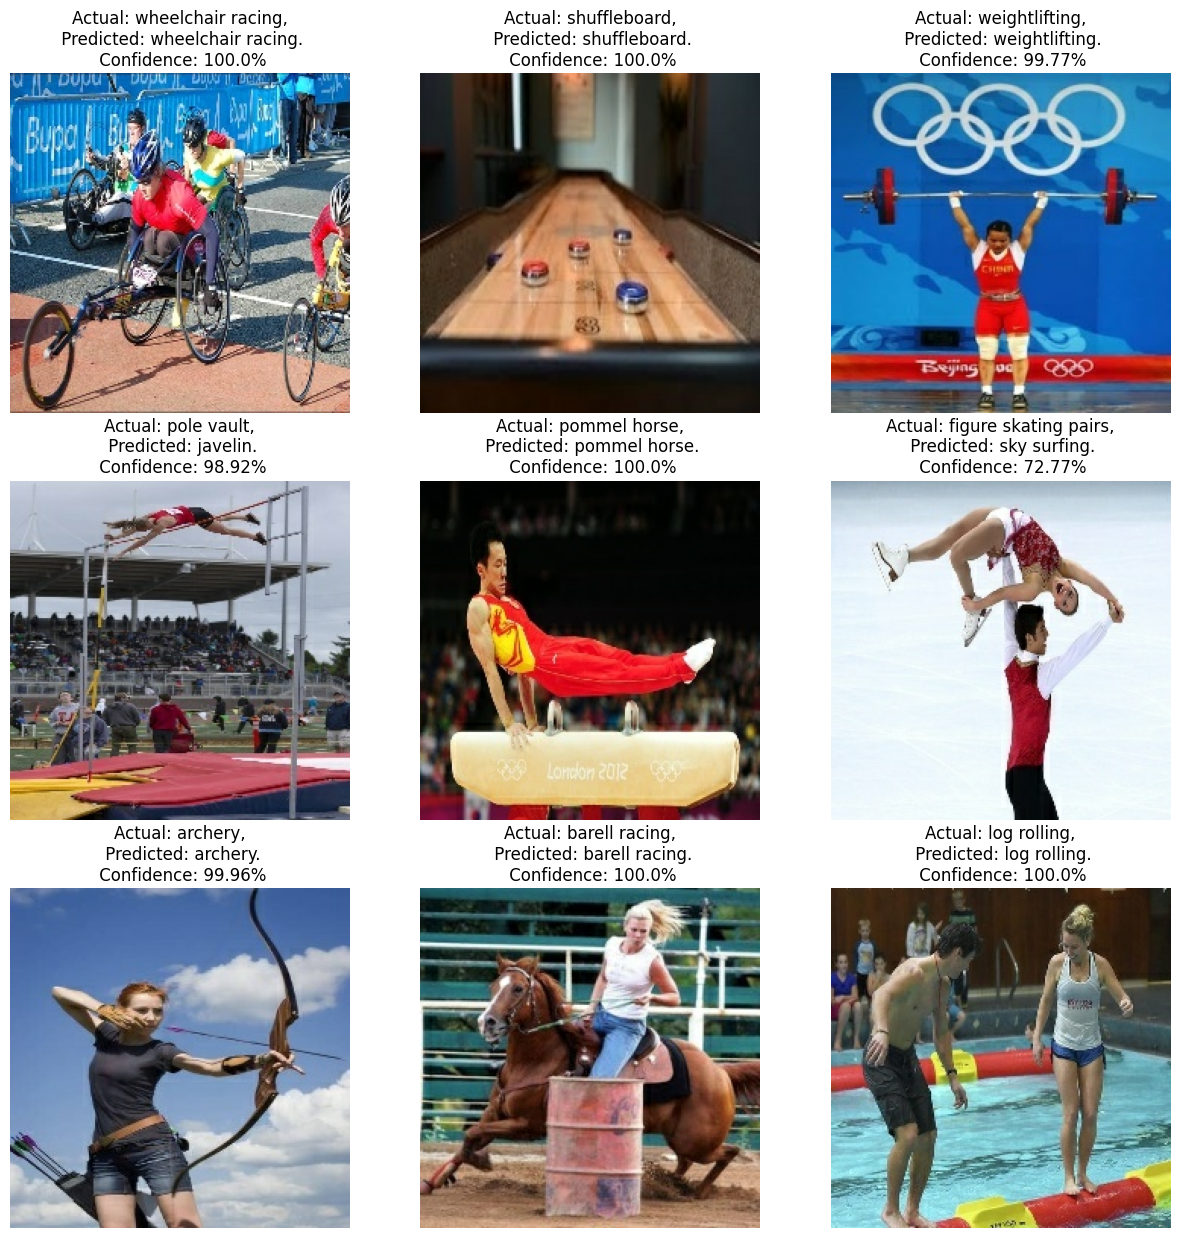

In [79]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        test_im = (images[i]*255.).numpy()
        plt.imshow(test_im.astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = CLASS_NAME[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

###Model Save

In [81]:
model_path = "/content/gdrive/My Drive/my_model.h5"
model.save(model_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [82]:
from google.colab import files
files.download(model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>